In [1]:
import pandas as pd
import firebase_admin
from firebase_admin import credentials
from firebase_admin import db
import json
import csv
import os.path

filename = 'master_measurments_14_04_2021_backup.csv'
 
# Fetch the service account key JSON file contents
cred = credentials.Certificate('nmbu-b421b-firebase-adminsdk-g2wnw-0cbc120783.json')
 
# Initialize the app with a service account, granting admin privileges
firebase_admin.initialize_app(cred, {
    'databaseURL': 'https://nmbu-b421b.firebaseio.com/'
})

file_exists = os.path.isfile(filename)

fieldnames_friendly = ['d', 't', 'PV panel', 'sensor 1', 'sensor 2', 'sensor 3', 'sensor 4'] 
fieldnames_working = ['d', 't', '3a0038000851353531343431', '310042000b47363339343638', '21001d000c47363339343638', '2c0024000c47363339343638', '420024000347363339343638']  

firebase_file = open(filename, 'a', newline='') 
csv_writer = csv.DictWriter(firebase_file, fieldnames=fieldnames_friendly) 
     
if not file_exists:
    csv_writer.writeheader()

csv_writer = csv.DictWriter(firebase_file, fieldnames=fieldnames_working) 

NMBUref = db.reference('NMBUdata')
NMBUdat = NMBUref.get()
d = {}
for dat in NMBUdat:
    d.update({'d': dat})
    for hou in NMBUdat[dat]:
        delete_user_ref = NMBUref.child(dat).child(hou)
        for tim in NMBUdat[dat][hou]:
            d.update({'t': tim}) 
            for ent in NMBUdat[dat][hou][tim]:
                d.update(NMBUdat[dat][hou][tim][ent])
            csv_writer.writerow(d)
            d = {}
        #delete_user_ref.delete() #uncomment if you want to delete backuped data from database
        
df = pd.read_csv(filename)

In [8]:
import pandas as pd

df = pd.read_csv('master_measurments_13_04_2021.csv')

df

,d,t,PV panel,sensor 1,sensor 2,sensor 3,sensor 4
0,130421.0,85935,NaN,"1157.3,1156.6,1158,1155.9,1158.4,1158,1159.4,1...","1032,1035.9,1035.3,1035.3,1036.3,1034.9,1035.9...","1042.7,1042.7,1042.7,1042.7,1043,1042.4,1042.7...","1033.2,1033.2,1032.9,1032.6,1032.2,1031.6,1032..."
1,NaN,85936,NaN,"1157.3,1158.7,1160.1,1158,1155.9,1156.2,1159.1...","1035.9,1035.6,1035.6,1035.9,1036.6,1034.9,1034...","1043.4,1043,1043,1042.7,1043,1042.4,1042.7,104...","1030.3,1030.9,1030.6,1029,1029.3,1030.6,1029.6..."
2,NaN,85937,NaN,"1159.4,1157.7,1156.6,1156.2,1155.2,1155.2,1157...","1034.6,1036.3,1037.9,1037.6,1037.6,1036.9,1037...","1042.7,1043.7,1043.4,1043.4,1042.7,1042.7,1044...","1029.9,1028.6,1028.3,1029,1028,1028.6,1028.6,1..."
3,NaN,85938,NaN,"1158.4,1161.2,1157.7,1158,1158.4,1157.3,1157.3...","1035.6,1036.6,1035.6,1037.6,1039.5,1036.6,1036...","1044,1044,1043.7,1043.7,1043,1043.7,1043,1043,...","1021.7,1021.4,1020.4,1020.4,1020.7,1021.1,1020..."
4,NaN,85939,NaN,"1159.1,1158.4,1158,1158.7,1157.7,1158.4,1158.7...","1038.5,1038.9,1039.8,1039.8,1038.5,1038.9,1037...","1045,1044.3,1044,1044.3,1044.6,1045.6,1045.3,1...","1021.4,1021.7,1020.7,1020.7,1021.4,1021.7,1023..."
...,...,...,...,...,...,...,...
19707,NaN,235955,NaN,NaN,NaN,"343.6,343.6,343.6,343.6,343.3,343.3,343.3,343....",NaN
19708,NaN,235956,NaN,NaN,NaN,"342,342,342,341.6,341.6,341.6,341.3,341.3,341....",NaN
19709,NaN,235957,NaN,NaN,NaN,"340.3,340.3,340,340,340,340,339.7,339.7,339.4,...",NaN
19710,NaN,235958,NaN,NaN,NaN,"338.7,338.7,338.4,338.4,338.4,338.1,338.1,338....",NaN


In [72]:
df_day.isna().sum()

d           19199
t               0
PV panel    19200
sensor 1        0
sensor 2        0
sensor 3      515
sensor 4        0
dtype: int64

In [41]:
df_day = df.iloc[:19200]
df.iloc[19200:]

,d,t,PV panel,sensor 1,sensor 2,sensor 3,sensor 4
19200,NaN,141935,NaN,NaN,NaN,NaN,"647.3,646.6,647.3,647.9,647.3,646.9,646.9,646...."
19201,999999.0,0,NaN,NaN,NaN,"335.8,336.1,335.8,335.5,335.5,335.5,335.5,335....",NaN
19202,NaN,1,NaN,NaN,NaN,"334.5,334.2,334.2,334.2,334.2,334.2,334.2,334....",NaN
19203,NaN,2,NaN,NaN,NaN,"333.2,333.2,333.2,332.9,332.9,332.9,332.9,332....",NaN
19204,NaN,3,NaN,NaN,NaN,"332.3,332.3,332.3,331.9,331.9,331.9,331.9,331....",NaN
...,...,...,...,...,...,...,...
19707,NaN,235955,NaN,NaN,NaN,"343.6,343.6,343.6,343.6,343.3,343.3,343.3,343....",NaN
19708,NaN,235956,NaN,NaN,NaN,"342,342,342,341.6,341.6,341.6,341.3,341.3,341....",NaN
19709,NaN,235957,NaN,NaN,NaN,"340.3,340.3,340,340,340,340,339.7,339.7,339.4,...",NaN
19710,NaN,235958,NaN,NaN,NaN,"338.7,338.7,338.4,338.4,338.4,338.1,338.1,338....",NaN


In [30]:
df_day.drop(['PV panel', 'd'], axis=1, inplace=True)
nan_string = '0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0'
df_clean = df_day.fillna(nan_string)
df_clean

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,t,sensor 1,sensor 2,sensor 3,sensor 4
0,85935,"1157.3,1156.6,1158,1155.9,1158.4,1158,1159.4,1...","1032,1035.9,1035.3,1035.3,1036.3,1034.9,1035.9...","1042.7,1042.7,1042.7,1042.7,1043,1042.4,1042.7...","1033.2,1033.2,1032.9,1032.6,1032.2,1031.6,1032..."
1,85936,"1157.3,1158.7,1160.1,1158,1155.9,1156.2,1159.1...","1035.9,1035.6,1035.6,1035.9,1036.6,1034.9,1034...","1043.4,1043,1043,1042.7,1043,1042.4,1042.7,104...","1030.3,1030.9,1030.6,1029,1029.3,1030.6,1029.6..."
2,85937,"1159.4,1157.7,1156.6,1156.2,1155.2,1155.2,1157...","1034.6,1036.3,1037.9,1037.6,1037.6,1036.9,1037...","1042.7,1043.7,1043.4,1043.4,1042.7,1042.7,1044...","1029.9,1028.6,1028.3,1029,1028,1028.6,1028.6,1..."
3,85938,"1158.4,1161.2,1157.7,1158,1158.4,1157.3,1157.3...","1035.6,1036.6,1035.6,1037.6,1039.5,1036.6,1036...","1044,1044,1043.7,1043.7,1043,1043.7,1043,1043,...","1021.7,1021.4,1020.4,1020.4,1020.7,1021.1,1020..."
4,85939,"1159.1,1158.4,1158,1158.7,1157.7,1158.4,1158.7...","1038.5,1038.9,1039.8,1039.8,1038.5,1038.9,1037...","1045,1044.3,1044,1044.3,1044.6,1045.6,1045.3,1...","1021.4,1021.7,1020.7,1020.7,1021.4,1021.7,1023..."
...,...,...,...,...,...
19195,141930,"759.4,759.4,759.8,760.5,759.8,760.1,760.1,759....","767.1,766.5,766.8,766.2,766.5,766.5,766.5,766....","759.6,760.9,760.9,760.3,760.6,761.2,760.3,759....","647.3,647.3,646.6,647.6,646.9,646.9,646.6,645...."
19196,141931,"758.7,759.4,759.8,759.8,758.7,760.1,759.4,759....","764.9,764.9,764.9,764.9,765.5,765.5,765.5,765....","760.6,760.3,759.6,759,758.7,758,758.3,759,759....","645.9,646.9,646.9,646.9,646.9,647.6,647.6,647...."
19197,141932,"758.7,758.7,759.1,759.1,758.7,758.4,758.4,758....","764.2,764.2,764.5,764.5,763.9,763.6,763.6,764....","758,758.7,759,759,759.6,758.7,758.7,758,758.3,...","647.6,647.3,647.6,647.3,646.9,647.6,647.3,647...."
19198,141933,"758,757.7,758,758.4,758,757.7,757.7,758,758.4,...","764.2,764.5,764.2,764.9,765.2,764.5,764.5,764....","759,759.6,759.3,758.7,759,759,758.3,759,758,75...","647.3,648.2,647.9,647.9,646.9,646.9,646.9,646...."


In [58]:
def convert_data_format(df, columns=None):
    if columns == None:
        columns = ['sensor 1', 'sensor 2', 'sensor 3', 'sensor 4']
        
    val_dict = dict()
    for column in columns:
        val_dict[column] = []
        
    for row in range(0, len(df)):
        for key in val_dict:
            unpacked = [float(number) for number in str(df[key].iloc[row]).split(',')]
            if len(unpacked) < 20:
                #print(row, key, len(unpacked))
                val_dict[key].append([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
            else:
                val_dict[key].append(unpacked)
    
    for key in val_dict:
        val_dict[key] = [item for sublist in val_dict[key] for item in sublist]
        
    #Make a new timestamp with higher resolution    
    time = list(df['t'])
    new_time = []

    for timestamp in time:
        for decimal in range(0, 20):
            new_time.append(timestamp + decimal/20)
    
    val_dict['time'] = new_time
    #Create a new dataframe with the new timestamps and values
    #for key in val_dict.keys():
        #print(key, len(val_dict[key]))
    new_frame = pd.DataFrame(val_dict)
    
    return new_frame


def time_convert(time_column):
    import datetime as dt
    
    time_column = time_column.add(20000) # add an hour

    time_column = time_column.apply(lambda x: str(f'{x:.2f}').zfill(9))
    
    time_column = time_column.apply(lambda x: dt.datetime.strptime(x, '%H%M%S.%f').strftime('%H:%M:%S:%f'))
    
    time_column = pd.to_datetime(time_column, format=f'%H:%M:%S:%f').dt.time
    return time_column


def define_mode(df, sensor, dP=700, dT=20):
    local_max = 0
    local_min = 0 
    max_index = 0
    min_index = 0
    interval = 0
    interval_list = []
    index_counter = df.index[0]
    while index_counter < df.index[-1]:
        #print(1)
        if interval >= 20*dT:
            local_max = 0
            local_min = 0
            interval = 0
            max_index = index_counter
            min_index = index_counter
            
        if local_max - local_min > dP:
            if not local_min == 0:
                interval_list.append((min_index, max_index, max_index-min_index))
                local_max = 0
                local_min = 0
                interval = 0
                max_index = index_counter
                min_index = index_counter
            else:
                local_max = 0
                local_min = 0
                interval = 0
                max_index = index_counter
                min_index = index_counter
                
        current_value = df[f'sensor {sensor}'][index_counter]
        if local_max == 0:
            local_max = current_value
        if local_min == 0:
            local_min = current_value
        
        if current_value > local_max:
            local_max = current_value
            max_index = index_counter
        
        if current_value < local_min:
            local_min = current_value
            min_index = index_counter
        
        index_counter += 1
        interval += 1
    return interval_list

In [32]:
processed_data = convert_data_format(df_day)
processed_data['datetime'] = time_convert(processed_data['time'])
processed_data = processed_data[['datetime', 'time', 'sensor 1', 'sensor 2', 'sensor 3', 'sensor 4']]

In [34]:
processed_data

,datetime,time,sensor 1,sensor 2,sensor 3,sensor 4
0,10:59:35,85935.00,1157.3,1032.0,1042.7,1033.2
1,10:59:35.050000,85935.05,1156.6,1035.9,1042.7,1033.2
2,10:59:35.100000,85935.10,1158.0,1035.3,1042.7,1032.9
3,10:59:35.150000,85935.15,1155.9,1035.3,1042.7,1032.6
4,10:59:35.200000,85935.20,1158.4,1036.3,1043.0,1032.2
...,...,...,...,...,...,...
383995,16:19:34.750000,141934.75,758.0,763.6,759.0,647.3
383996,16:19:34.800000,141934.80,757.7,763.2,758.7,647.6
383997,16:19:34.850000,141934.85,758.4,764.2,759.0,646.9
383998,16:19:34.900000,141934.90,757.7,764.2,758.3,647.9


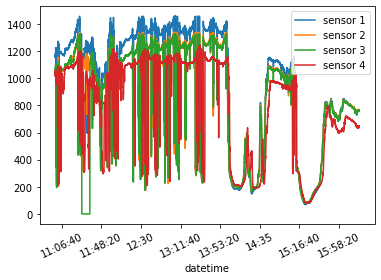

In [73]:
processed_data.plot(x='datetime', y=[f'sensor {x}' for x in range(1, 5)], rot=25)

(0.0, 400.0)

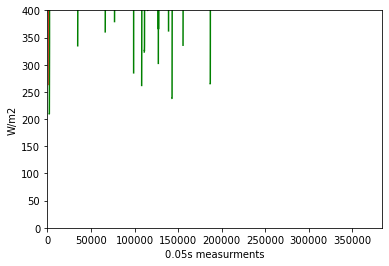

In [66]:
import matplotlib.pyplot as plt
result = define_mode(processed_data, sensor=1, dP=750, dT=20)

for entry in result:
    if entry[0] < entry[1]:
        processed_data['sensor 1'][entry[0]:entry[1]].plot(xlim=[0, len(processed_data)], c='g')
    else:
        processed_data['sensor 1'][entry[1]:entry[0]].plot(xlim=[0, len(processed_data)], c='r')
plt.xlabel('0.05s measurments')
plt.ylabel('W/m2')
#plt.ylim([0, 400])

In [63]:
len(result)

52

In [67]:
def reg_plot(df, sensor_nr, y_lim=None, plot=True):
    from sklearn.metrics import r2_score
    
    x = [x for x in range(df.index[0], df.index[-1]+1)]
    y =  df[f'sensor {sensor_nr}']
    
    reg_model = np.poly1d(np.polyfit(x, y, 3))
    if plot:
        df.plot(y=[f'sensor {sensor_nr}'], ylim=y_lim, x='datetime')
        plt.plot(df['datetime'], reg_model(x), label='3-poly approx')
        plt.legend()
    
    print('R2 score:', r2_score(y, reg_model(x)))
    return reg_model(x), r2_score(y, reg_model(x))


def fraction_point(gradient, frac=0.4):
    return min(gradient)+((1-frac)*(max(gradient)-min(gradient)))


def closest_point(gradient, tol=0.05):
    counter = 0
    frac_point = fraction_point(gradient)
    while True:
        if counter == len(gradient):
            tol += 0.1
            counter = 0
        
        if abs(gradient[counter] - frac_point) <= tol:
            return gradient[counter]
        counter += 1
        

def find_time_diff(interval, increase=False, fraction=True, tol=0.15):
    sensor1, r2_1 = reg_plot(interval, 1, plot=False)
    gradient1 = np.gradient(sensor1, 0.05)
    interval['gradient1'] = gradient1
    
    sensor2, r2_2 = reg_plot(interval, 2, plot=False)
    gradient2 = np.gradient(sensor2, 0.05)
    interval['gradient2'] = gradient2

    sensor3, r2_3 = reg_plot(interval, 3, plot=False)
    gradient3 = np.gradient(sensor3, 0.05)
    interval['gradient3'] = gradient3
    
    sensor4, r2_4 = reg_plot(interval, 4, plot=False)
    gradient4 = np.gradient(sensor4, 0.05)
    interval['gradient4'] = gradient4

    if fraction:
        index1 = list(gradient1).index(closest_point(gradient1, tol=tol))
        index2 = list(gradient2).index(closest_point(gradient2, tol=tol)) 
        index3 = list(gradient3).index(closest_point(gradient3, tol=tol))
        index4 = list(gradient4).index(closest_point(gradient4, tol=tol))
    else:
        index1 = list(gradient1).index(min(gradient1, key=lambda x:abs(x-0)))
        index2 = list(gradient2).index(min(gradient2, key=lambda x:abs(x-0))) 
        index3 = list(gradient3).index(min(gradient3, key=lambda x:abs(x-0)))
        index4 = list(gradient4).index(min(gradient4, key=lambda x:abs(x-0)))
    
    the_list = [index1, index2, index3]
    
    for n in range(3):
        print(f'sensor {n+1} time', abs((min(the_list)-the_list[n])/20))
    print('sensor 4 time', abs((min(the_list)-index4)/20))

    interval.plot(y=[f'gradient{sensor}' for sensor in range(1,4)], x='datetime', rot=25)
    plt.axvline(interval['datetime'].iloc[index1], c='b')
    plt.axvline(interval['datetime'].iloc[index2], c='orange')
    plt.axvline(interval['datetime'].iloc[index3], c='g')
    plt.legend()
    plt.xlabel('Time')
    plt.ylabel('d(W/m2) / dT')
    #plt.savefig('intersect.png')
    return index1, index2, index3, index4, (r2_1 + r2_2 + r2_3 + r2_4)/4

In [68]:
import numpy as np


def get_all_time_diff(df, tol=0.15, fraction=True, skip=[]):
    time_diff_list = []
    r2_list = []
    counter = 0
    for entry in result:
        temp_list = []
        if counter in skip:
            pass
        elif entry[2] >= 0:
            interval = df.iloc[entry[0]:entry[1]]
            index1, index2, index3, index4, r2_avg = find_time_diff(interval, increase=True, fraction=fraction, tol=tol)
            the_list = [index1, index2, index3]
            for n in range(3):
                temp_list.append(abs((min(the_list)-the_list[n])/20))
            
        else:
            interval = df.iloc[entry[1]:entry[0]]
            index1, index2, index3, index4, r2_avg = find_time_diff(interval, fraction=fraction, tol=tol)
            the_list = [index1, index2, index3]
            for n in range(3):
                temp_list.append(abs((min(the_list)-the_list[n])/20))
        time_diff_list.append(temp_list)
        r2_list.append(r2_avg)
        counter += 1
    print('Average R2 score:', sum(r2_list)/len(result))
    return time_diff_list

R2 score: 0.9837834290321005
R2 score: 0.9920200469181252
R2 score: 0.9834975272829669
R2 score: 0.7865977323576463
sensor 1 time 0.15
sensor 2 time 1.9
sensor 3 time 0.0
sensor 4 time 0.75
R2 score: 0.9847209563525503
R2 score: 0.9948461596589019
R2 score: 0.9940086760988881
R2 score: 0.8809160915452885
sensor 1 time 3.25
sensor 2 time 0.0
sensor 3 time 1.0
sensor 4 time 3.65
R2 score: 0.9776515392596912
R2 score: 0.9888647967702017
R2 score: 0.9860264710385479
R2 score: 0.7481555278648195
sensor 1 time 0.4
sensor 2 time 0.25
sensor 3 time 0.0
sensor 4 time 10.7
R2 score: 0.9932474230960786
R2 score: 0.9990581994972312
R2 score: 0.9910614996526197
R2 score: 0.6345880357805037
sensor 1 time 0.0
sensor 2 time 5.2
sensor 3 time 5.25
sensor 4 time 0.9
R2 score:

<ipython-input-67-5d387f0369e3>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interval['gradient1'] = gradient1
<ipython-input-67-5d387f0369e3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interval['gradient2'] = gradient2
<ipython-input-67-5d387f0369e3>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

 0.9987728579243429
R2 score: 0.9985705825556983
R2 score: 0.99892092420721
R2 score: 0.6585917153292233
sensor 1 time 0.0
sensor 2 time 2.35
sensor 3 time 0.95
sensor 4 time 0.7
R2 score: 0.9209134984948196
R2 score: 0.8857728596895944
R2 score: 0.8943258657119946
R2 score: 0.9766048502067378
sensor 1 time 0.0
sensor 2 time 12.85
sensor 3 time 13.75
sensor 4 time 11.5
R2 score: 0.9898962666381708
R2 score: 0.9927606431026863
R2 score: 0.9792090335465095
R2 score: 0.7851159857631338
sensor 1 time 4.1
sensor 2 time 0.0
sensor 3 time 0.4
sensor 4 time 8.4
R2 score: 0.999549335805041
R2 score: 0.9990474966388894


<ipython-input-67-5d387f0369e3>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interval['gradient1'] = gradient1
<ipython-input-67-5d387f0369e3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interval['gradient2'] = gradient2
<ipython-input-67-5d387f0369e3>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

R2 score: 0.9927338210162341
R2 score: 0.9861162060679523
sensor 1 time 0.0
sensor 2 time 3.3
sensor 3 time 3.0
sensor 4 time 0.65
R2 score: 0.9808332586162277
R2 score: 0.9970717991514446
R2 score: 0.9905045999683596
R2 score: 0.9085681349575785
sensor 1 time 0.35
sensor 2 time 0.05
sensor 3 time 0.0
sensor 4 time 0.75
R2 score: 0.9572494010167826
R2 score: 0.9462852614626198
R2 score: 1.0
R2 score: 0.9949626263593595
sensor 1 time 14.1
sensor 2 time 3.9
sensor 3 time 0.0
sensor 4 time 6.05


<ipython-input-67-5d387f0369e3>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interval['gradient3'] = gradient3
<ipython-input-67-5d387f0369e3>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interval['gradient4'] = gradient4
<ipython-input-67-5d387f0369e3>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

R2 score: 0.9908072475155004
R2 score: 0.9977120236255252
R2 score: 0.981721809206789
R2 score: 0.9946596001231827
sensor 1 time 5.05
sensor 2 time 0.0
sensor 3 time 0.85
sensor 4 time 2.05
R2 score: 0.9995116749748166
R2 score: 0.9989207628765816
R2 score: 0.999744066954269
R2 score: 0.898020844218169
sensor 1 time 0.15
sensor 2 time 2.0
sensor 3 time 0.0
sensor 4 time 0.55
R2 score: 0.9763597491603699
R2 score: 0.9944089362173087
R2 score: 0.9911453900141727
R2 score: 0.9547185067080433
sensor 1 time 1.05
sensor 2 time 0.0
sensor 3 time 0.1
sensor 4 time 0.7
R2 score:

<ipython-input-67-5d387f0369e3>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interval['gradient1'] = gradient1
<ipython-input-67-5d387f0369e3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interval['gradient2'] = gradient2
<ipython-input-67-5d387f0369e3>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

 0.9772909565861994
R2 score: 0.9877045403618783
R2 score: 0.9703774391168737
R2 score: 0.6109153151191488
sensor 1 time 4.85
sensor 2 time 0.0
sensor 3 time 0.15
sensor 4 time 2.0
R2 score: 0.9847446839500288
R2 score: 0.9982532741967042
R2 score: 0.9849351849912624
R2 score: 0.9669451332205299
sensor 1 time 2.65
sensor 2 time 0.0
sensor 3 time 0.35
sensor 4 time 5.75
R2 score: 0.9896496612672531
R2 score: 0.9728929897963124
R2 score: 0.9814387085487488
R2 score: 0.9895178692093687
sensor 1 time 5.35
sensor 2 time 0.0
sensor 3 time 0.6
sensor 4 time 5.55
R2 score: 0.9901067348353159
R2 score: 0.9962093626158832
R2 score: 0.9906059944594761
R2 score:

<ipython-input-67-5d387f0369e3>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interval['gradient1'] = gradient1
<ipython-input-67-5d387f0369e3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interval['gradient2'] = gradient2
<ipython-input-67-5d387f0369e3>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

 0.08403758323876342
sensor 1 time 0.0
sensor 2 time 4.65
sensor 3 time 4.5
sensor 4 time 0.95
R2 score: 0.9790875167337214
R2 score: 0.9839922383287228
R2 score: 0.9989688680291341
R2 score: 0.9544327039162488
sensor 1 time 3.3
sensor 2 time 0.0
sensor 3 time 0.5
sensor 4 time 0.95
R2 score: 0.9651267079081246
R2 score: 0.9491061018052851
R2 score: 0.9795352424723767
R2 score: 0.31278984279280064
sensor 1 time 5.7
sensor 2 time 0.0
sensor 3 time 2.65
sensor 4 time 1.55
R2 score:

<ipython-input-67-5d387f0369e3>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interval['gradient4'] = gradient4
<ipython-input-67-5d387f0369e3>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interval['gradient1'] = gradient1
<ipython-input-67-5d387f0369e3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

 0.9829867063011435
R2 score: 0.981379340726738
R2 score: 0.9936962789340813
R2 score: 0.507235405728176
sensor 1 time 0.0
sensor 2 time 1.3
sensor 3 time 8.45
sensor 4 time 1.3
R2 score: 0.9986142252069116
R2 score: 0.9982827929479074
R2 score: 0.9995436393069957
R2 score: 0.3461804009976652
sensor 1 time 0.05
sensor 2 time 0.0
sensor 3 time 0.0
sensor 4 time 1.45
R2 score: 0.999107490667997
R2 score: 0.9991478617364317
R2 score: 0.9987106949542038
R2 score:

<ipython-input-67-5d387f0369e3>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interval['gradient1'] = gradient1
<ipython-input-67-5d387f0369e3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interval['gradient2'] = gradient2
<ipython-input-67-5d387f0369e3>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

 0.23985617784810098
sensor 1 time 0.0
sensor 2 time 0.0
sensor 3 time 0.45
sensor 4 time 1.2
R2 score: 0.9962880813163061
R2 score: 0.993684907681126
R2 score: 0.9914823410917164
R2 score: 0.8973730628335521
sensor 1 time 0.6
sensor 2 time 0.3
sensor 3 time 0.0
sensor 4 time 9.6
R2 score: 0.7429988201691727
R2 score: 0.7870115669184927
R2 score: 0.7172796916733699
R2 score: 0.9651559062729318
sensor 1 time 0.0
sensor 2 time 10.55
sensor 3 time 1.75
sensor 4 time 1.75
R2 score: 0.8711052543105283
R2 score: 0.9632924222800281
R2 score: 0.8548125876345032


<ipython-input-67-5d387f0369e3>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interval['gradient4'] = gradient4
C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
<ipython-input-67-5d387f0369e3>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

R2 score: 0.6493956969155359
sensor 1 time 0.1
sensor 2 time 0.0
sensor 3 time 0.1
sensor 4 time 6.65
R2 score: 0.9978449486027503
R2 score: 0.999283971797254
R2 score: 0.9977241519854168
R2 score: 0.987478102596
sensor 1 time 2.45
sensor 2 time 0.0
sensor 3 time 2.55
sensor 4 time 2.8
R2 score: 0.9740293884803942
R2 score: 0.9723610599623207
R2 score: 0.8798538236637894
R2 score: 0.9966618945718752
sensor 1 time 7.35
sensor 2 time 6.6
sensor 3 time 0.0
sensor 4 time 0.65
R2 score:

<ipython-input-67-5d387f0369e3>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interval['gradient1'] = gradient1
<ipython-input-67-5d387f0369e3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interval['gradient2'] = gradient2
<ipython-input-67-5d387f0369e3>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

 0.9981716254335552
R2 score: 0.9980368977631178
R2 score: 0.9944644174409831
R2 score: 0.17396446993333847
sensor 1 time 2.8
sensor 2 time 0.0
sensor 3 time 1.4
sensor 4 time 0.75
R2 score: 0.9967627019426701
R2 score: 0.9958320422702108
R2 score: 0.9972828419554703
R2 score: 0.20926294907762388
sensor 1 time 2.1
sensor 2 time 0.0
sensor 3 time 1.1
sensor 4 time 5.25
R2 score: 0.9981880284453444
R2 score: 0.9946429929151911
R2 score: 0.9987438430739166
R2 score: 0.9327073412121596
sensor 1 time 0.0
sensor 2 time 0.25
sensor 3 time 6.75
sensor 4 time 7.05
R2 score: 0.950311694057498
R2 score:

<ipython-input-67-5d387f0369e3>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interval['gradient1'] = gradient1
<ipython-input-67-5d387f0369e3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interval['gradient2'] = gradient2
<ipython-input-67-5d387f0369e3>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

 0.9744819767940534
R2 score: 0.9289753625044331
R2 score: 0.9185967403205941
sensor 1 time 0.3
sensor 2 time 0.0
sensor 3 time 0.1
sensor 4 time 15.1
R2 score: 0.9989164366204379
R2 score: 0.9988526287925767
R2 score: 0.9960118521998406
R2 score: 0.10252508879302802
sensor 1 time 0.15
sensor 2 time 0.0
sensor 3 time 5.6
sensor 4 time 1.0
R2 score: 0.9998695543982815
R2 score: 0.9997360348036163
R2 score: 0.9997097303545188
R2 score: 0.14773277866257828
sensor 1 time 0.0
sensor 2 time 0.5
sensor 3 time 2.1
sensor 4 time 0.35
R2 score:

<ipython-input-67-5d387f0369e3>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interval['gradient1'] = gradient1
<ipython-input-67-5d387f0369e3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interval['gradient2'] = gradient2
<ipython-input-67-5d387f0369e3>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

 0.9906865324935537
R2 score: 0.9914304621031338
R2 score: 0.9877989034806274
R2 score: 0.06450554068319381
sensor 1 time 0.0
sensor 2 time 5.05
sensor 3 time 0.45
sensor 4 time 1.65
R2 score: 0.9979560288954014
R2 score: 0.9991558479519482
R2 score: 0.9986293138238825
R2 score: 0.2647488816602912
sensor 1 time 0.9
sensor 2 time 0.0
sensor 3 time 0.1
sensor 4 time 0.6


<ipython-input-67-5d387f0369e3>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interval['gradient1'] = gradient1
<ipython-input-67-5d387f0369e3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interval['gradient2'] = gradient2
<ipython-input-67-5d387f0369e3>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

R2 score: 0.997495383653961
R2 score: 0.9946782690479498
R2 score: 0.9975295397561664
R2 score: 0.04273089837365929
sensor 1 time 0.0
sensor 2 time 2.95
sensor 3 time 0.15
sensor 4 time 0.6
R2 score: 0.9622901586802945
R2 score: 0.9866959141481028
R2 score: 0.866393239453745
R2 score: 0.00575380212588994
sensor 1 time 0.1
sensor 2 time 0.0
sensor 3 time 0.2
sensor 4 time 10.0
R2 score: 0.9407004663536818
R2 score: 0.9838846663583951
R2 score: 0.9139138632942062
R2 score: 0.9968980278769839
sensor 1 time 6.0
sensor 2 time 0.6
sensor 3 time 0.0
sensor 4 time 3.05
R2 score:

<ipython-input-67-5d387f0369e3>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interval['gradient1'] = gradient1
<ipython-input-67-5d387f0369e3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interval['gradient2'] = gradient2
<ipython-input-67-5d387f0369e3>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

 0.9224055258563342
R2 score: 0.8699963328199518
R2 score: 0.8882444757716066
R2 score: 0.952728067420662
sensor 1 time 0.3
sensor 2 time 0.0
sensor 3 time 0.1
sensor 4 time 0.7
R2 score: 0.9993354418476386
R2 score: 0.9998000907072147
R2 score: 0.9995701685375735
R2 score: 0.9872994861016914
sensor 1 time 1.05
sensor 2 time 0.0
sensor 3 time 0.6
sensor 4 time 0.0
R2 score: 0.9907997034751802
R2 score: 0.9942672982559491
R2 score: 0.9951518822618137
R2 score: 0.42019224755842177
sensor 1 time 4.0
sensor 2 time 0.0
sensor 3 time 0.1
sensor 4 time 4.15
R2 score:

<ipython-input-67-5d387f0369e3>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interval['gradient1'] = gradient1
<ipython-input-67-5d387f0369e3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interval['gradient2'] = gradient2
<ipython-input-67-5d387f0369e3>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

 0.9999812358119742
R2 score: 0.9947251743156835
R2 score: 0.9994817785532666
R2 score: 0.9953070206111082
sensor 1 time 0.0
sensor 2 time 0.95
sensor 3 time 1.95
sensor 4 time 0.9
R2 score: 0.9934440906852849
R2 score: 0.9968670652267342
R2 score: 0.9997692381094242
R2 score: 0.9009480106089407
sensor 1 time 0.6
sensor 2 time 0.0
sensor 3 time 0.2
sensor 4 time 2.05
R2 score: 0.9971629467341886
R2 score: 0.9927615590001037
R2 score: 0.9992385833460735
R2 score: 0.5945903655417708
sensor 1 time 3.35
sensor 2 time 0.0
sensor 3 time 0.9
sensor 4 time 1.65


<ipython-input-67-5d387f0369e3>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interval['gradient1'] = gradient1
<ipython-input-67-5d387f0369e3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interval['gradient2'] = gradient2
<ipython-input-67-5d387f0369e3>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

R2 score: 0.9942921818209604
R2 score: 0.9971893393245337
R2 score: 0.9955611020859106
R2 score: 0.9657797121705454
sensor 1 time 1.55
sensor 2 time 0.0
sensor 3 time 0.3
sensor 4 time 0.2
R2 score: 0.9991358986121399
R2 score: 0.9943912023036932
R2 score: 0.9844625436946732
R2 score: 0.8275504175473496
sensor 1 time 4.2
sensor 2 time 0.0
sensor 3 time 4.45
sensor 4 time 1.5
R2 score: 0.9837172081986204
R2 score: 0.9932069437219334
R2 score: 0.9799911405592351
R2 score: 0.9845371396180375
sensor 1 time 3.9
sensor 2 time 0.0
sensor 3 time 0.0
sensor 4 time 0.5
R2 score: 0.9625338824648378
R2 score: 0.9854805853123463
R2 score: 0.8280006900101626
R2 score: 0.8204782386811706
sensor 1 time 5.65
sensor 2 time 5.45
sensor 3 time 0.0
sensor 4 time 0.05
R2 score:

<ipython-input-67-5d387f0369e3>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interval['gradient1'] = gradient1
<ipython-input-67-5d387f0369e3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interval['gradient2'] = gradient2
<ipython-input-67-5d387f0369e3>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

 0.7275758654534344
R2 score: 0.7743382216841096
R2 score: 0.8206087499379634
R2 score: 0.8273210359391223
sensor 1 time 1.1
sensor 2 time 0.0
sensor 3 time 0.4
sensor 4 time 8.55
R2 score: 0.9990497109498728
R2 score: 0.9969636613377006
R2 score: 0.990567639191298
R2 score: 0.9984751348548986
sensor 1 time 2.95
sensor 2 time 0.2
sensor 3 time 0.0
sensor 4 time 3.05
R2 score: 0.9427732740240301
R2 score: 0.9818998424709953
R2 score: 0.9734915159697789
R2 score: 0.9582037583530343
sensor 1 time 0.2
sensor 2 time 0.0
sensor 3 time 0.05
sensor 4 time 6.95
R2 score: 0.9658193849370011
R2 score: 0.9884450714435105

<ipython-input-67-5d387f0369e3>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interval['gradient1'] = gradient1
<ipython-input-67-5d387f0369e3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interval['gradient2'] = gradient2
<ipython-input-67-5d387f0369e3>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i


R2 score: 0.9834827934872551
R2 score: 0.9944165006003605
sensor 1 time 0.0
sensor 2 time 0.2
sensor 3 time 0.3
sensor 4 time 4.55
Average R2 score: 0.9057650915555014


<ipython-input-67-5d387f0369e3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interval['gradient2'] = gradient2
<ipython-input-67-5d387f0369e3>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interval['gradient3'] = gradient3
<ipython-input-67-5d387f0369e3>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

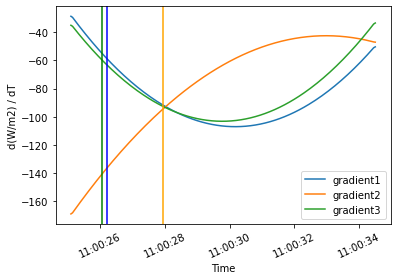

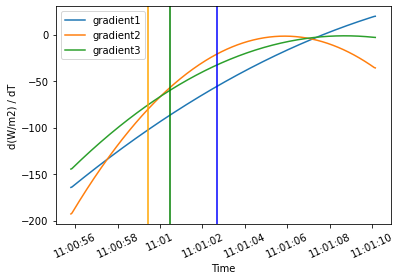

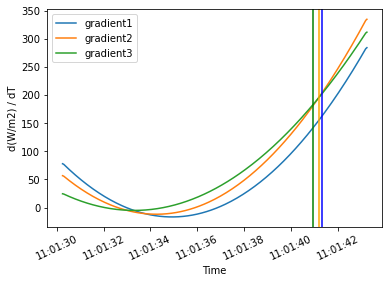

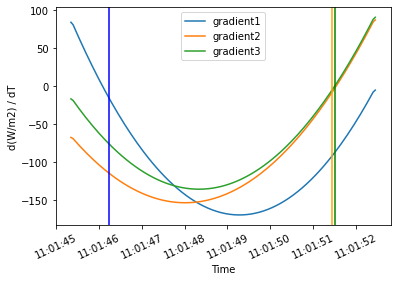

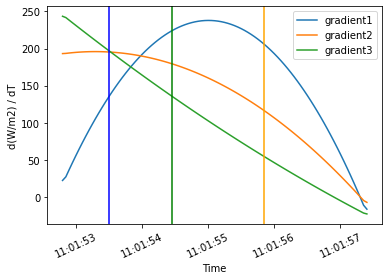

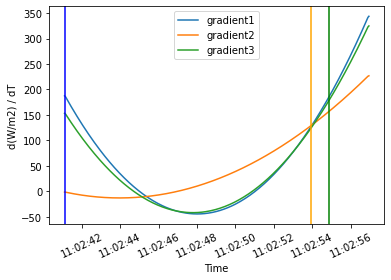

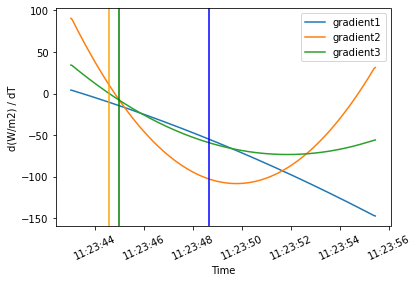

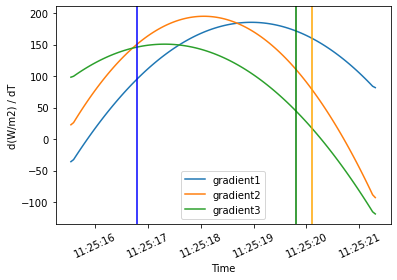

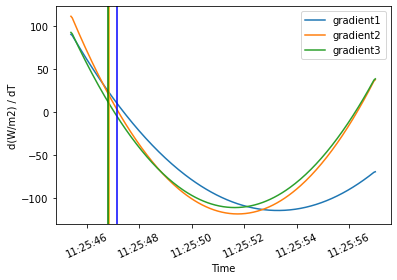

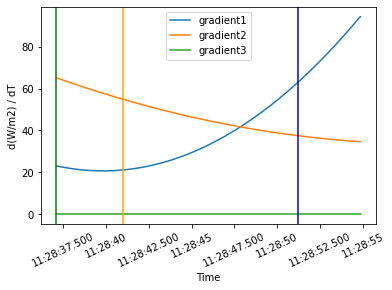

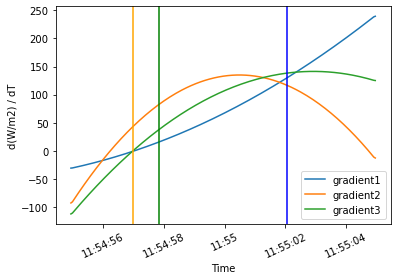

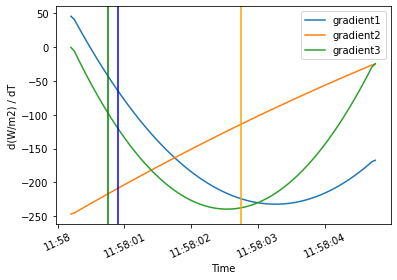

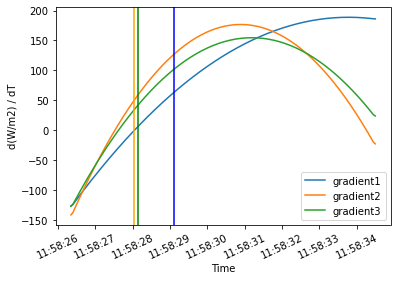

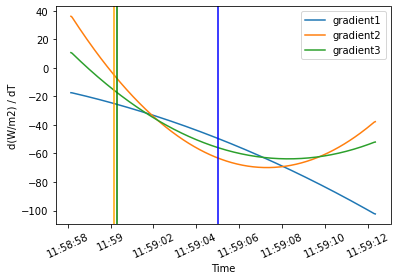

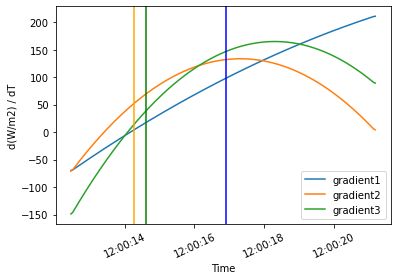

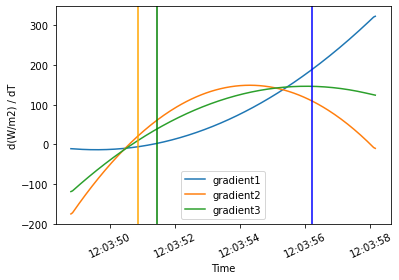

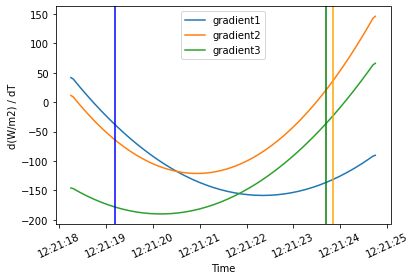

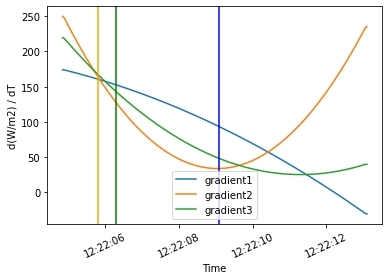

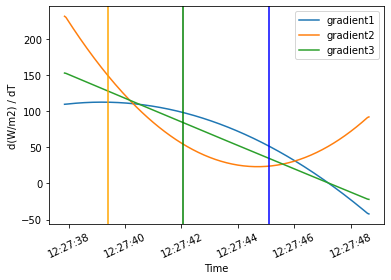

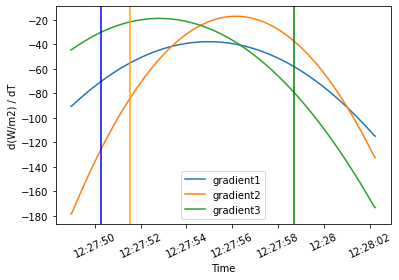

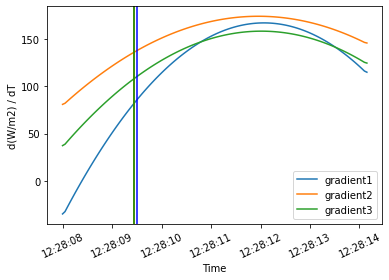

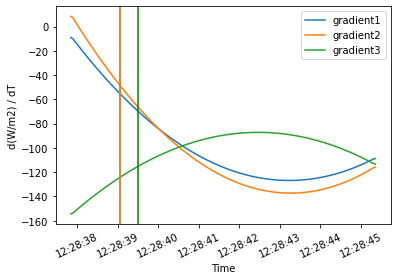

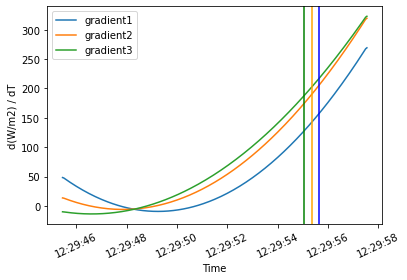

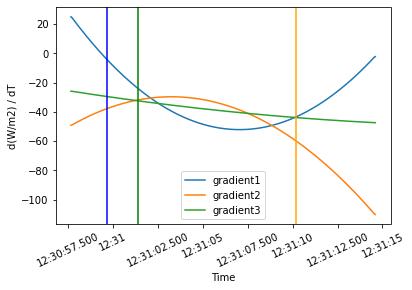

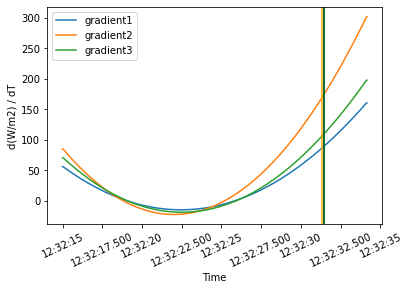

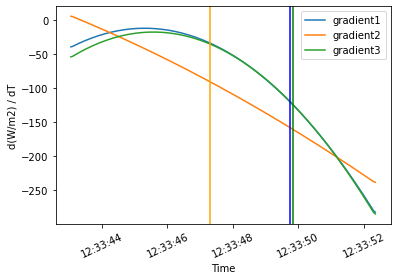

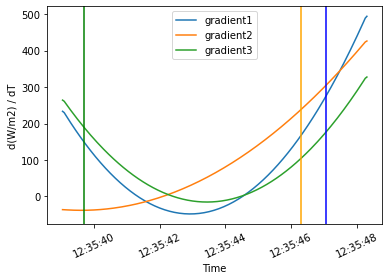

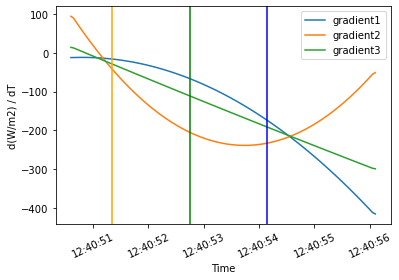

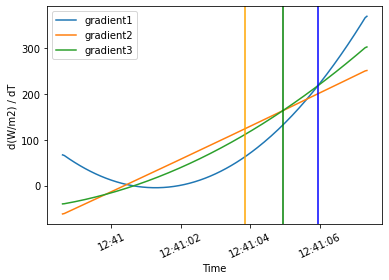

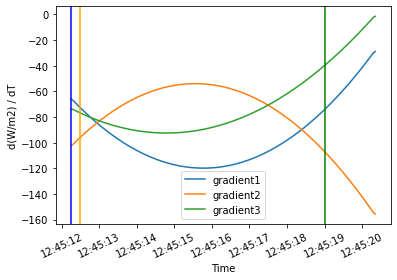

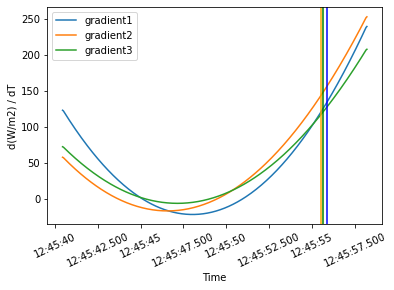

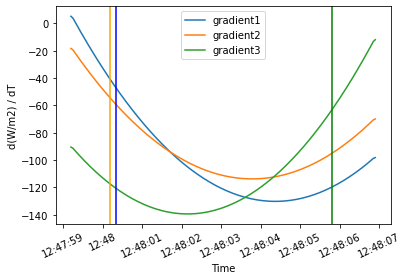

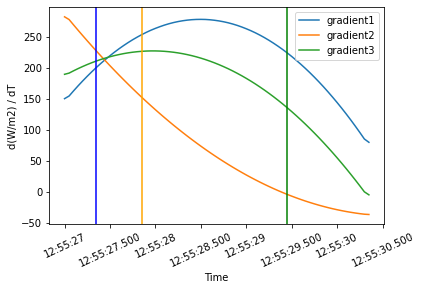

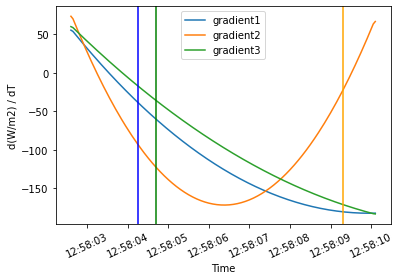

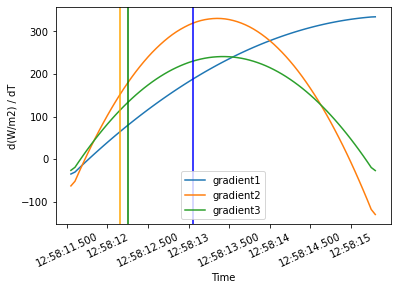

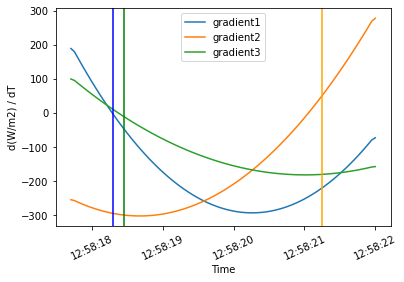

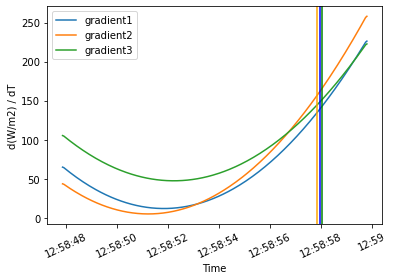

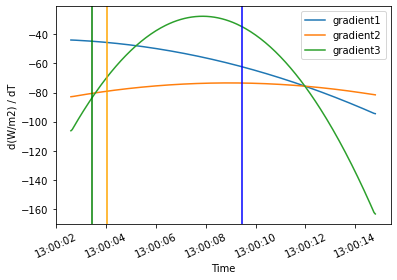

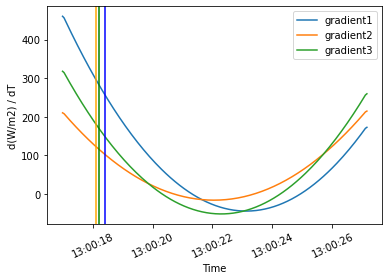

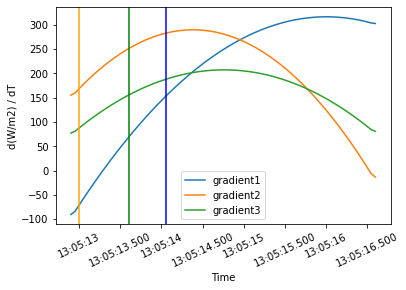

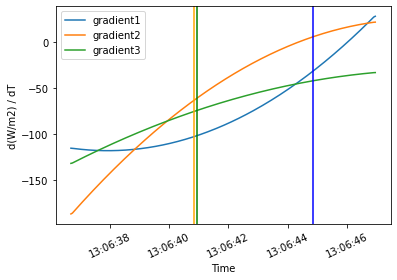

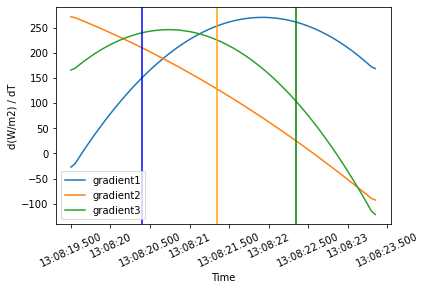

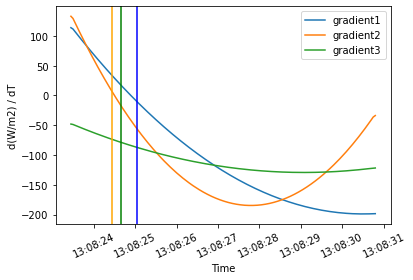

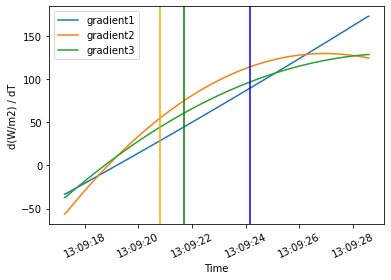

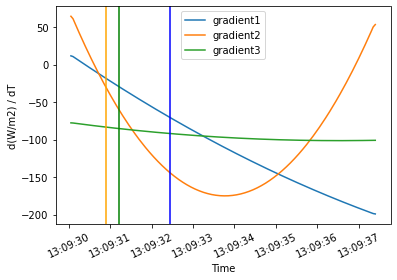

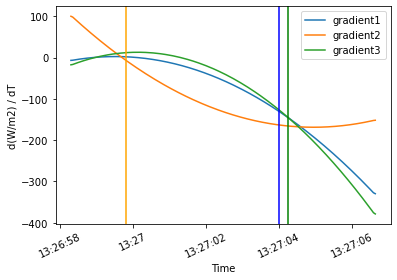

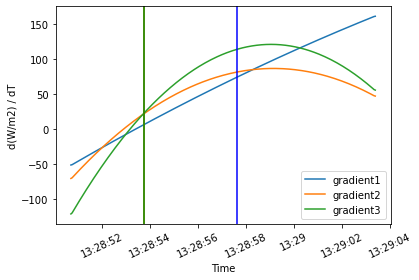

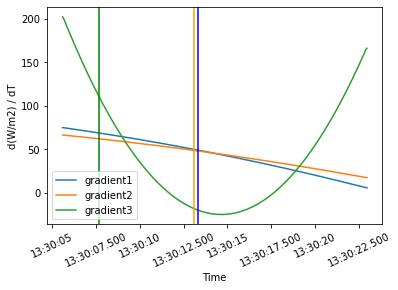

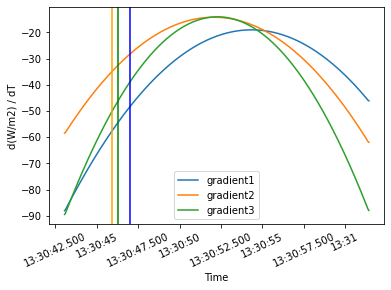

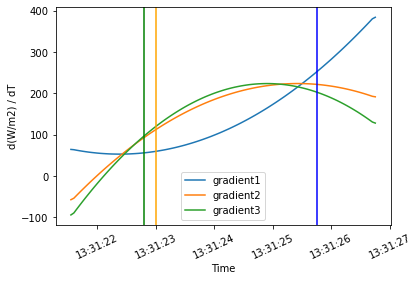

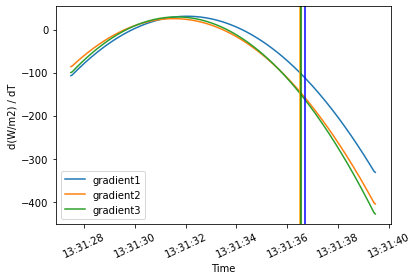

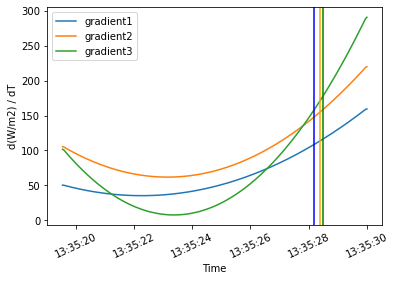

In [69]:
time_diffs = get_all_time_diff(processed_data, tol=0.5, fraction=True)

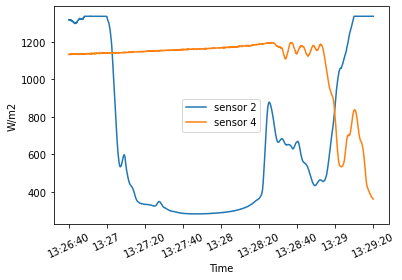

In [143]:
def plot_interval(df, start, stop, sensors=None):
    if sensors == None:
        sensors = [1, 2, 3, 4]
    sliced_data = df.loc[(stop > df['time']) & (df['time'] > start)]
    color_dict = {1: 'c', 2:'gold', 3:'g'}
    xs = [x for x in range(len(sliced_data))]
    sliced_data.plot(x='datetime', y=[f'sensor {sensor}' for sensor in sensors], rot=25)
    plt.legend()
    plt.xlabel('Time')
    plt.ylabel('W/m2')


plot_interval(processed_data, 112640, 112920, sensors=[2, 4])

In [70]:
from math import sin, cos, acos, asin, degrees, radians, sqrt, atan
from statistics import median
import matplotlib.pyplot as plt


def calculate_angle(mid_time, end_time, distance):
    over = end_time*distance - mid_time*distance*cos(radians(60))
    under = mid_time*distance*sin(radians(60))
    return degrees(atan((over/under)))


def triangulate(a_time, b_time, c_time):
    distance = 15
    
    time_dict = {'A': a_time, 'B': b_time, 'C': c_time}
    
    start_point = min(time_dict, key=time_dict.get)
    start_time = time_dict[start_point]
    
    end_point = max(time_dict, key=time_dict.get)
    end_time = time_dict[end_point] - start_time
    
    time_dict.pop(start_point)
    time_dict.pop(end_point)
    
    mid_point = max(time_dict, key=time_dict.get)
    mid_time = time_dict[mid_point] - start_time
    
    print(f'{start_point}:{start_time} | {mid_point}:{mid_time} | {end_point}:{end_time}')
   
    angle = calculate_angle(mid_time, end_time, distance)
    
    if start_point == 'A':
        if b_time <= c_time:
            north = 30
            angle = -calculate_angle(mid_time, end_time, distance)
        else:
            north = 330
            angle = calculate_angle(mid_time, end_time, distance)
    
    elif start_point == 'B':
        if a_time <= c_time:
            north = 210
            angle = calculate_angle(mid_time, end_time, distance)
        else:
            north = 270
            angle = -calculate_angle(mid_time, end_time, distance)
        
    elif start_point == 'C':
        if a_time <= b_time:
            north = 150
            angle = -calculate_angle(mid_time, end_time, distance)
        else:
            north = 90
            angle = calculate_angle(mid_time, end_time, distance)
    
    speed = (distance*cos(radians(angle)))/mid_time
    
    if 0 < north + angle < 360:
        angle_north = north + angle

    elif north + angle < 0:
        angle_north = north + angle + 360
    
    else:
        angle_north = north + angle - 360
    
    print(f'Starts in {start_point}, angle:{angle:.2f}, angle north:{angle_north:.2f}, speed:{speed:.2f} m/s')
    
    height = (sqrt(3)/2)*distance
    y_centre = height - ((distance/2)**2)/((distance*sqrt(3))/2)
    
    plt.quiver(0, y_centre, (sin(radians(north+angle))), cos(radians(north+angle)), scale=7)
    xs = [-distance/2, 0, distance/2, -distance/2]
    ys = [sqrt(distance**2 - (distance/2)**2), 0, sqrt(distance**2 - (distance/2)**2), sqrt(distance**2 - (distance/2)**2)]
    
    plt.plot(xs, ys)
    plt.scatter(xs, ys, color='red')
    plt.text(-distance/2, height-height/10, '3', color='g')
    plt.text(-0.1, height/10, '1', color='g')
    plt.text(distance/2, height-height/10, '2', color='g')
    plt.axis('equal')
    plt.show()
    return angle_north, speed

C:0.0 | A:0.15 | B:1.9
Starts in C, angle:-85.93, angle north:64.07, speed:7.10 m/s


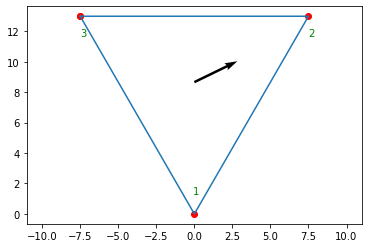

B:0.0 | C:1.0 | A:3.25
Starts in B, angle:-72.52, angle north:197.48, speed:4.51 m/s


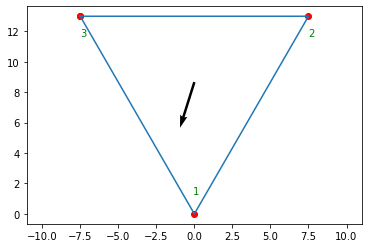

C:0.0 | B:0.25 | A:0.4
Starts in C, angle:51.79, angle north:141.79, speed:37.12 m/s


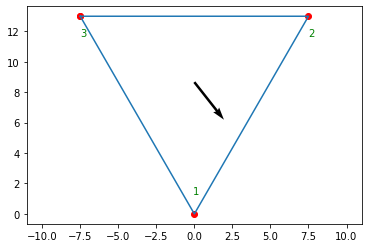

A:0.0 | B:5.2 | C:5.25
Starts in A, angle:-30.47, angle north:359.53, speed:2.49 m/s


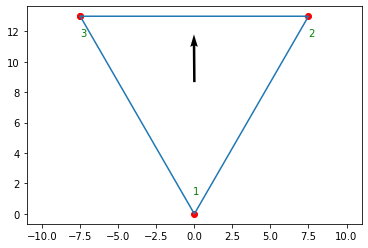

A:0.0 | C:0.95 | B:2.35
Starts in A, angle:66.31, angle north:36.31, speed:6.34 m/s


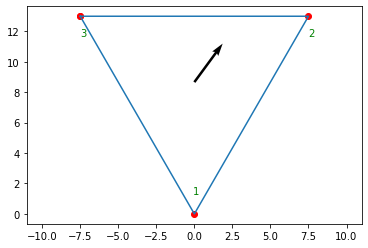

A:0.0 | B:12.85 | C:13.75
Starts in A, angle:-33.35, angle north:356.65, speed:0.98 m/s


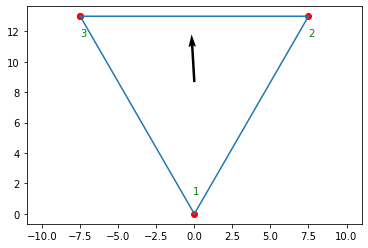

B:0.0 | C:0.4 | A:4.1
Starts in B, angle:-84.92, angle north:185.08, speed:3.32 m/s


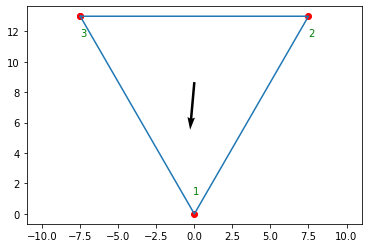

A:0.0 | C:3.0 | B:3.3
Starts in A, angle:34.72, angle north:4.72, speed:4.11 m/s


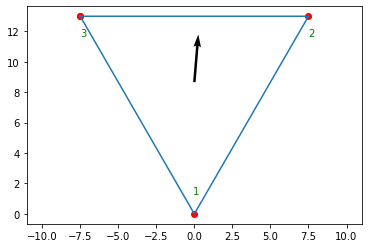

C:0.0 | B:0.05 | A:0.35
Starts in C, angle:82.41, angle north:172.41, speed:39.62 m/s


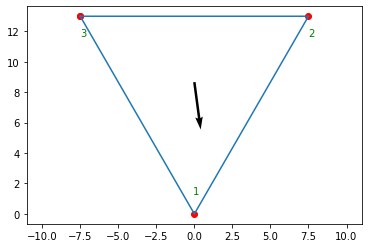

C:0.0 | B:3.9 | A:14.1
Starts in C, angle:74.46, angle north:164.46, speed:1.03 m/s


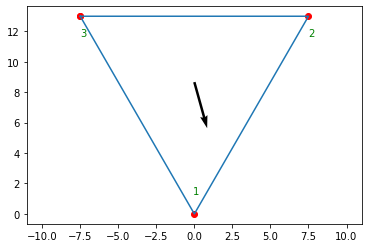

B:0.0 | C:0.85 | A:5.05
Starts in B, angle:-80.96, angle north:189.04, speed:2.77 m/s


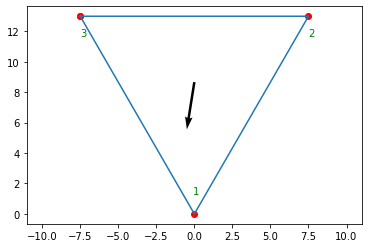

C:0.0 | A:0.15 | B:2.0
Starts in C, angle:-86.14, angle north:63.86, speed:6.73 m/s


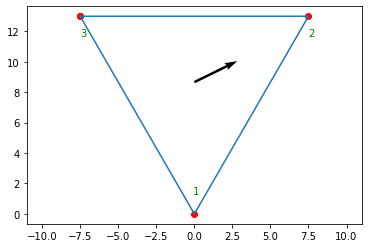

B:0.0 | C:0.1 | A:1.05
Starts in B, angle:-85.05, angle north:184.95, speed:12.94 m/s


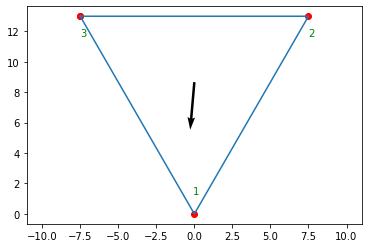

B:0.0 | C:0.15 | A:4.85
Starts in B, angle:-88.44, angle north:181.56, speed:2.72 m/s


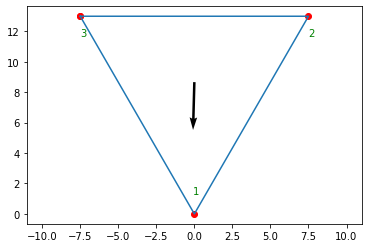

B:0.0 | C:0.35 | A:2.65
Starts in B, angle:-83.02, angle north:186.98, speed:5.21 m/s


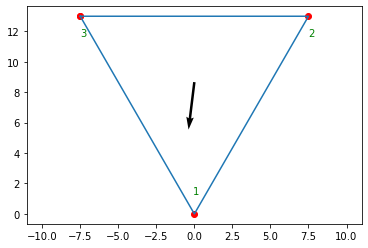

B:0.0 | C:0.6 | A:5.35
Starts in B, angle:-84.13, angle north:185.87, speed:2.56 m/s


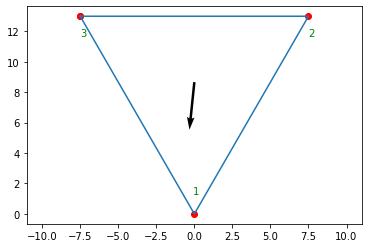

A:0.0 | C:4.5 | B:4.65
Starts in A, angle:31.63, angle north:1.63, speed:2.84 m/s


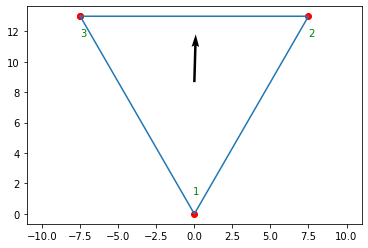

B:0.0 | C:0.5 | A:3.3
Starts in B, angle:-81.92, angle north:188.08, speed:4.22 m/s


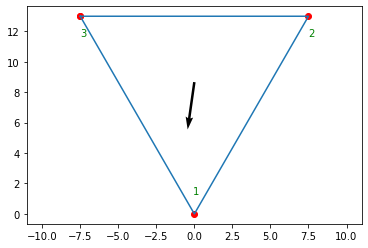

B:0.0 | C:2.65 | A:5.7
Starts in B, angle:-62.32, angle north:207.68, speed:2.63 m/s


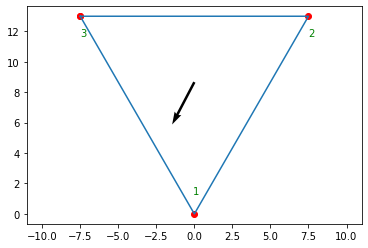

A:0.0 | B:1.3 | C:8.45
Starts in A, angle:-81.79, angle north:308.21, speed:1.65 m/s


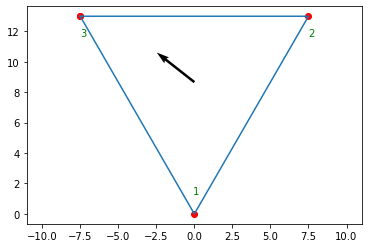

C:0.0 | B:0.3 | A:0.6
Starts in C, angle:60.00, angle north:150.00, speed:25.00 m/s


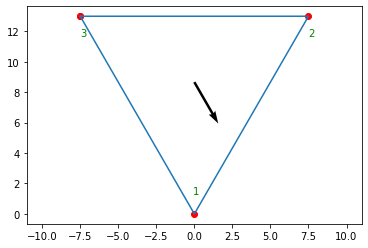

A:0.0 | C:1.75 | B:10.55
Starts in A, angle:81.10, angle north:51.10, speed:1.33 m/s


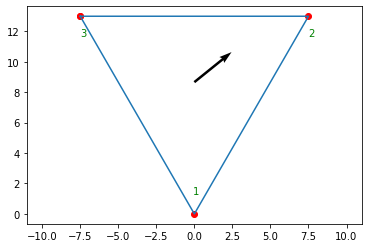

B:0.0 | C:0.1 | A:0.1
Starts in B, angle:30.00, angle north:240.00, speed:129.90 m/s


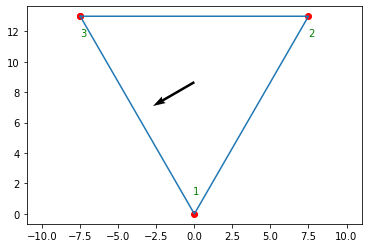

B:0.0 | A:2.45 | C:2.55
Starts in B, angle:31.98, angle north:241.98, speed:5.19 m/s


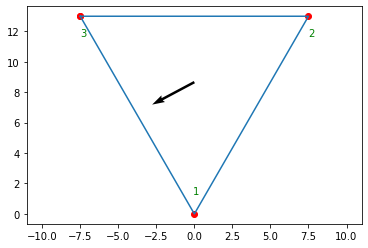

C:0.0 | B:6.6 | A:7.35
Starts in C, angle:35.32, angle north:125.32, speed:1.85 m/s


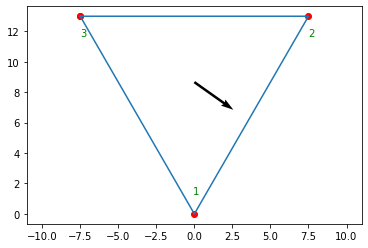

B:0.0 | C:1.4 | A:2.8
Starts in B, angle:-60.00, angle north:210.00, speed:5.36 m/s


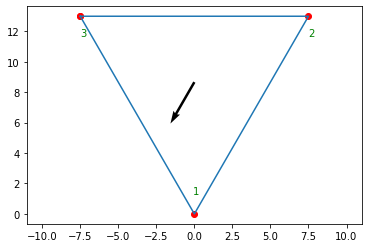

B:0.0 | C:1.1 | A:2.1
Starts in B, angle:-58.43, angle north:211.57, speed:7.14 m/s


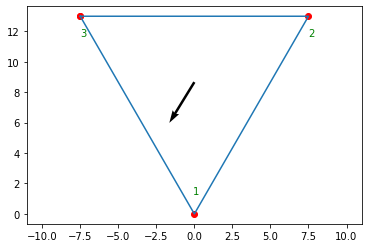

A:0.0 | B:0.25 | C:6.75
Starts in A, angle:-88.13, angle north:301.87, speed:1.96 m/s


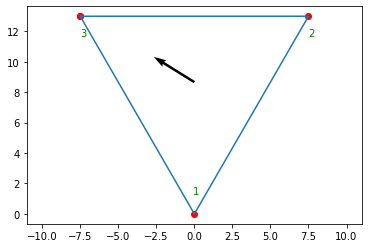

B:0.0 | C:0.1 | A:0.3
Starts in B, angle:-70.89, angle north:199.11, speed:49.10 m/s


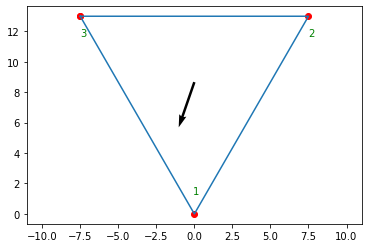

B:0.0 | A:0.15 | C:5.6
Starts in B, angle:88.65, angle north:298.65, speed:2.35 m/s


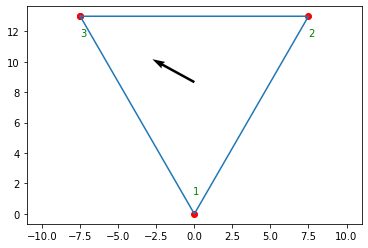

A:0.0 | B:0.5 | C:2.1
Starts in A, angle:-76.83, angle north:313.17, speed:6.84 m/s


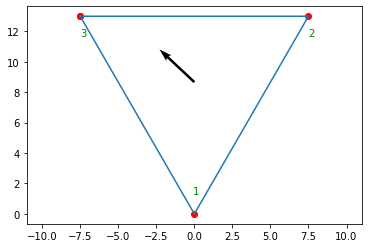

A:0.0 | C:0.45 | B:5.05
Starts in A, angle:85.38, angle north:55.38, speed:2.68 m/s


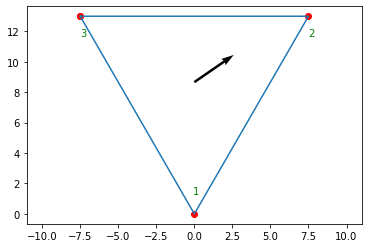

B:0.0 | C:0.1 | A:0.9
Starts in B, angle:-84.18, angle north:185.82, speed:15.20 m/s


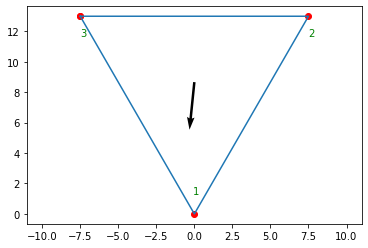

A:0.0 | C:0.15 | B:2.95
Starts in A, angle:87.41, angle north:57.41, speed:4.51 m/s


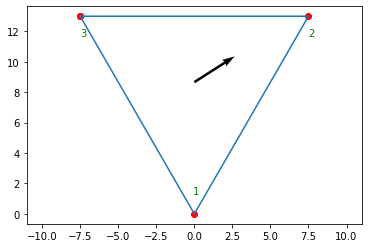

B:0.0 | A:0.1 | C:0.2
Starts in B, angle:60.00, angle north:270.00, speed:75.00 m/s


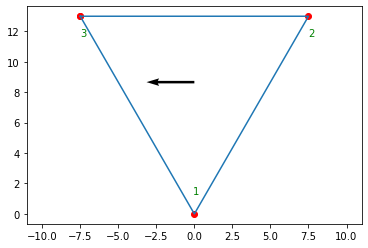

C:0.0 | B:0.6 | A:6.0
Starts in C, angle:84.79, angle north:174.79, speed:2.27 m/s


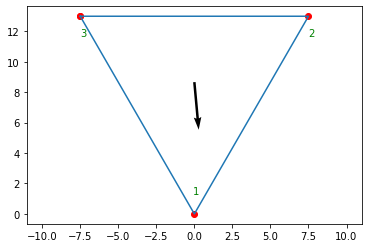

B:0.0 | C:0.1 | A:0.3
Starts in B, angle:-70.89, angle north:199.11, speed:49.10 m/s


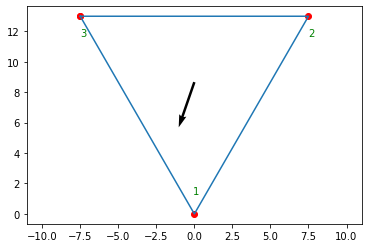

B:0.0 | C:0.6 | A:1.05
Starts in B, angle:-55.28, angle north:214.72, speed:14.24 m/s


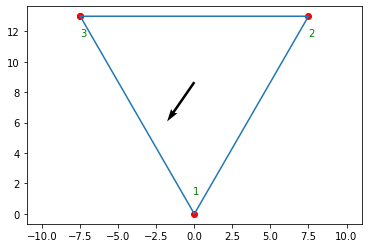

B:0.0 | C:0.1 | A:4.0
Starts in B, angle:-88.74, angle north:181.26, speed:3.29 m/s


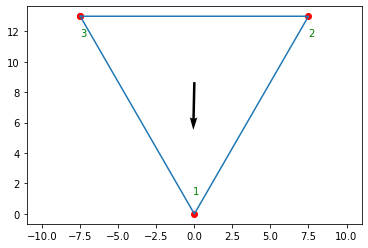

A:0.0 | B:0.95 | C:1.95
Starts in A, angle:-60.85, angle north:329.15, speed:7.69 m/s


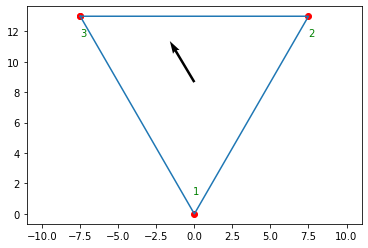

B:0.0 | C:0.2 | A:0.6
Starts in B, angle:-70.89, angle north:199.11, speed:24.55 m/s


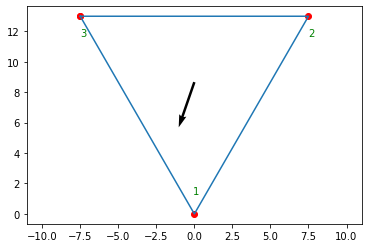

B:0.0 | C:0.9 | A:3.35
Starts in B, angle:-74.96, angle north:195.04, speed:4.33 m/s


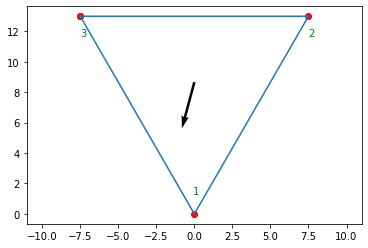

B:0.0 | C:0.3 | A:1.55
Starts in B, angle:-79.49, angle north:190.51, speed:9.12 m/s


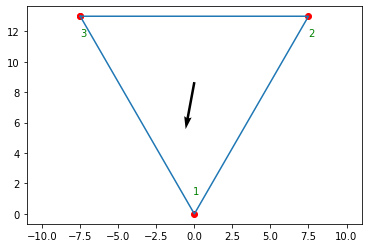

B:0.0 | A:4.2 | C:4.45
Starts in B, angle:32.87, angle north:242.87, speed:3.00 m/s


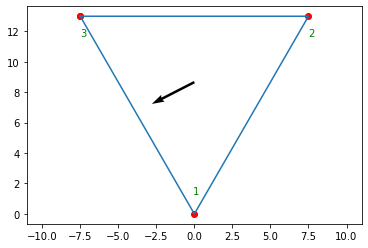

C:0.0 | B:5.45 | A:5.65
Starts in C, angle:31.79, angle north:121.79, speed:2.34 m/s


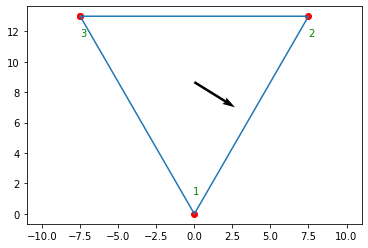

B:0.0 | C:0.4 | A:1.1
Starts in B, angle:-68.95, angle north:201.05, speed:13.47 m/s


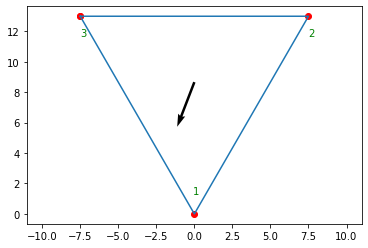

C:0.0 | B:0.2 | A:2.95
Starts in C, angle:86.52, angle north:176.52, speed:4.55 m/s


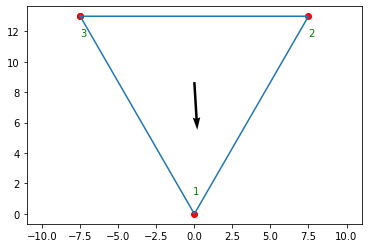

B:0.0 | C:0.05 | A:0.2
Starts in B, angle:-76.10, angle north:193.90, speed:72.06 m/s


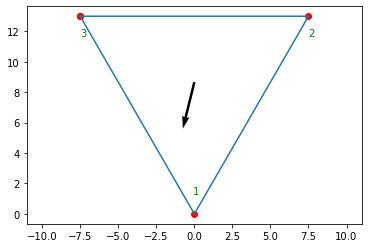

A:0.0 | B:0.2 | C:0.3
Starts in A, angle:-49.11, angle north:340.89, speed:49.10 m/s


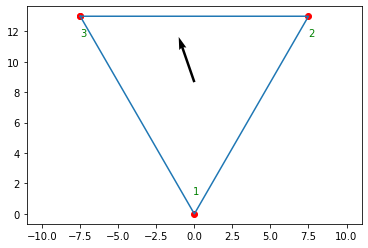

avg angle: 188.8255228739849 std: 86.10344580246606
avg speed: 15.171370374866608 std: 24.448325132555308


In [71]:
triang_speeds = []
triang_angles = []
for entry in time_diffs:
    if len(entry) == 3:
        if not ((entry[0] == 0) and (entry[1] == 0)):
            if not (entry[1] == 0 and entry[2] == 0):
                if not (entry[2] == 0 and entry[0] == 0):
                    angle, speed = triangulate(entry[0], entry[1], entry[2])
                    triang_angles.append(angle)
                    triang_speeds.append(speed)
                
print('avg angle:', sum(triang_angles)/len(triang_angles), 'std:', np.std(triang_angles))
print('avg speed:', sum(triang_speeds)/len(triang_speeds), 'std:', np.std(triang_speeds))

In [144]:
len(triang_speeds)

49

In [145]:
time_diffs

[[0.15, 1.9, 0.0],
 [3.25, 0.0, 1.0],
 [0.4, 0.25, 0.0],
 [0.0, 5.2, 5.25],
 [0.0, 2.35, 0.95],
 [0.0, 12.85, 13.75],
 [4.1, 0.0, 0.4],
 [0.0, 3.3, 3.0],
 [0.35, 0.05, 0.0],
 [14.1, 3.9, 0.0],
 [5.05, 0.0, 0.85],
 [0.15, 2.0, 0.0],
 [1.05, 0.0, 0.1],
 [4.85, 0.0, 0.15],
 [2.65, 0.0, 0.35],
 [5.35, 0.0, 0.6],
 [0.0, 4.65, 4.5],
 [3.3, 0.0, 0.5],
 [5.7, 0.0, 2.65],
 [0.0, 1.3, 8.45],
 [0.05, 0.0, 0.0],
 [0.0, 0.0, 0.45],
 [0.6, 0.3, 0.0],
 [0.0, 10.55, 1.75],
 [0.1, 0.0, 0.1],
 [2.45, 0.0, 2.55],
 [7.35, 6.6, 0.0],
 [2.8, 0.0, 1.4],
 [2.1, 0.0, 1.1],
 [0.0, 0.25, 6.75],
 [0.3, 0.0, 0.1],
 [0.15, 0.0, 5.6],
 [0.0, 0.5, 2.1],
 [0.0, 5.05, 0.45],
 [0.9, 0.0, 0.1],
 [0.0, 2.95, 0.15],
 [0.1, 0.0, 0.2],
 [6.0, 0.6, 0.0],
 [0.3, 0.0, 0.1],
 [1.05, 0.0, 0.6],
 [4.0, 0.0, 0.1],
 [0.0, 0.95, 1.95],
 [0.6, 0.0, 0.2],
 [3.35, 0.0, 0.9],
 [1.55, 0.0, 0.3],
 [4.2, 0.0, 4.45],
 [3.9, 0.0, 0.0],
 [5.65, 5.45, 0.0],
 [1.1, 0.0, 0.4],
 [2.95, 0.2, 0.0],
 [0.2, 0.0, 0.05],
 [0.0, 0.2, 0.3]]